In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import cmocean
import importlib

In [74]:
importlib.reload(glacier)
ngridx=50
ngridz=20
D=200 # m
L=2e4 # m
dt= 2e2 # 
T= 1e6
zz=50
C,S=glacier.glacier(ngridx,ngridz,dt,zz,T)
Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T, steady = False)

Text(0.45, 0.95, 'Steady vs Sinks Methane Concentration')

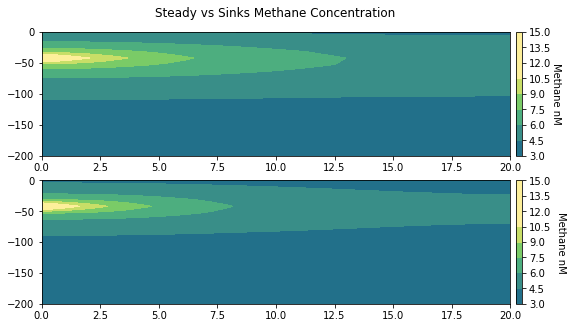

In [75]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap,  vmin = 0, vmax = 11)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 11)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Steady vs Sinks Methane Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('fig.pdf')

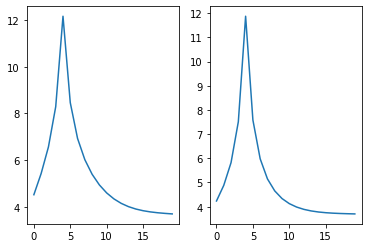

In [76]:
fig, axs=plt.subplots(1,2)
axs[0].plot(C[-1, 2, :].T)
axs[1].plot(Cs[-1, 2, :].T)

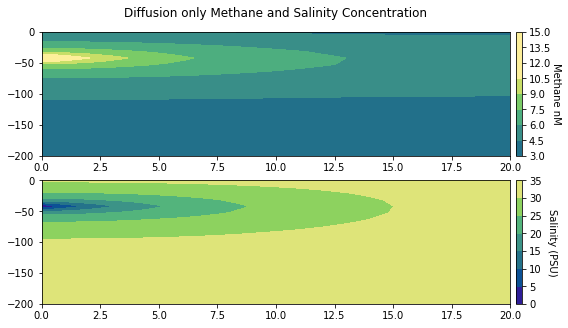

In [79]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 11)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,S[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 35)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Diffusion only Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
plt.savefig('SteadyDiffusion.pdf')

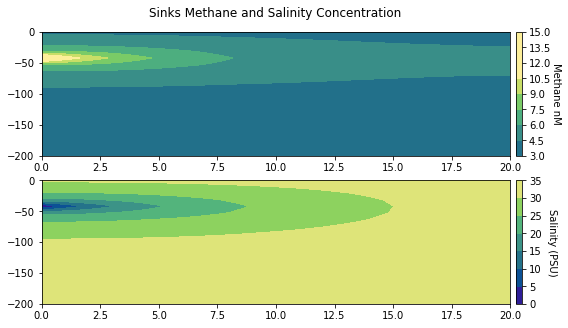

In [80]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 11)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Ss[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 35)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Sinks Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
plt.savefig('SinksDiffusion.pdf')

In [43]:
C.shape

(5000, 50, 20)

In [72]:
# Create diagonal matrix:

v = np.ones(C.shape[1])
k = 0
v1 = np.ones(C.shape[1])*(-2)
k1 = 1
v2 = np.ones(C.shape[1])*(-1)
k2 = 2
operator_x = np.diag(v,k)
operator_x1 = np.diag(v1[0:-2],k1) # + np.diag(v2,k2)
print(operator_x)
print(operator_x1)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0. -2. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -2.  0.]
 [ 0.  0.  0. ...  0.  0. -2.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [70]:
operator_x.shape

(50, 50)

In [71]:
operator_x1.shape

(51, 51)

In [2]:
Cn[:,:,0:Dp] = C[:,:, 0:Dp] + dt*(diffx(C[:,:, 0:Dp])*Kx/(dx**2)+
                                  Kz*diffz(C[:,:, 0:Dp]/(dz**2)-Ro*C[:,:, 0:Dp]-
                                           Kd/(dz*0.000025)*(Kd/(dz*0.000025)*(C[:,:,0:Dp] - 3.7))))

NameError: name 'C' is not defined